In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1=pd.read_csv(r"C:\Users\Gazal V\Desktop\Ai and machine learning\train_loan.csv")

In [4]:
data1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data1['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [6]:
data1['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [7]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data1['Gender'] = data1['Gender'].fillna('Male')
data1['Married'] = data1['Married'].fillna('Yes')
data1['Dependents'] = data1['Dependents'].fillna(data1['Dependents'].mode()[0])
data1['Self_Employed'] = data1['Self_Employed'].fillna('No')
data1['LoanAmount'] = data1['LoanAmount'].fillna(data1['LoanAmount'].mean())
data1['Loan_Amount_Term'] = data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mode()[0])
data1['Credit_History'] = data1['Credit_History'].fillna(data1['Credit_History'].mode()[0])

In [11]:
data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
corr_matrix= data1.corr()

[]

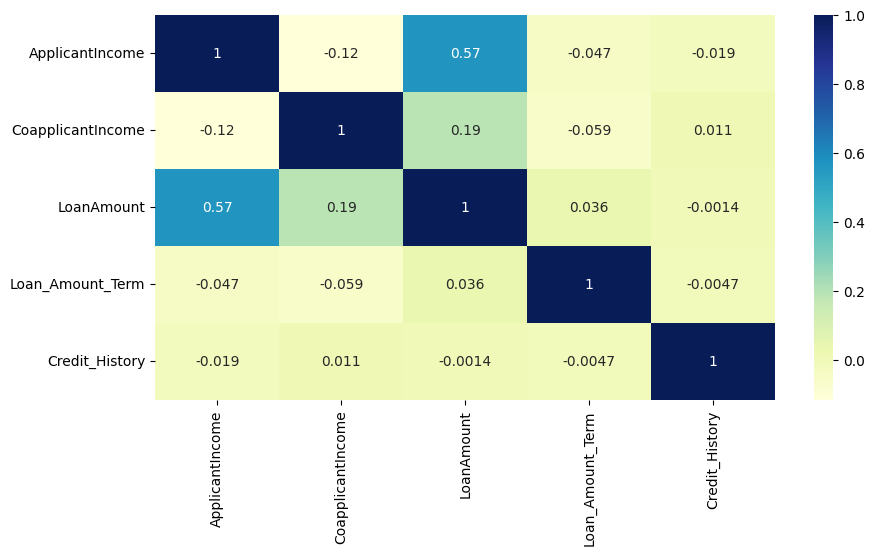

In [13]:
plt.subplots(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.plot()

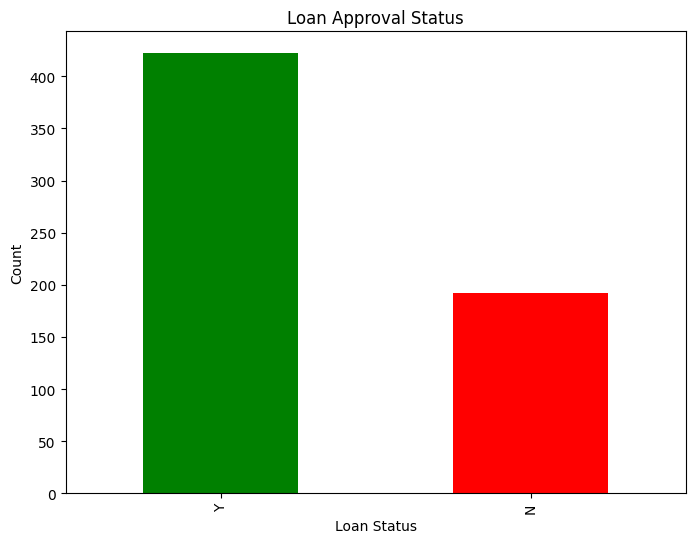

In [14]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# Plotting the bar chart
data1['Loan_Status'].value_counts().plot.bar(color=['green', 'red'])  # Customize colors if desired
# Adding labels and title
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
# Display the plot
plt.show()

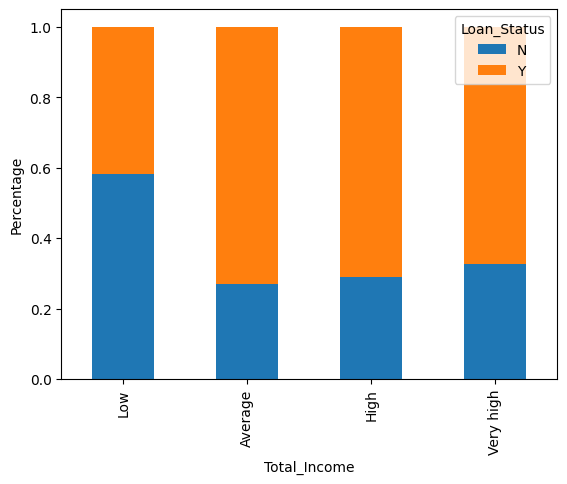

In [15]:
data1['Total_Income'] = data1['ApplicantIncome'] + data1['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
data1['Total_Income_bin'] = pd.cut(data1['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(data1['Total_Income_bin'], data1['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

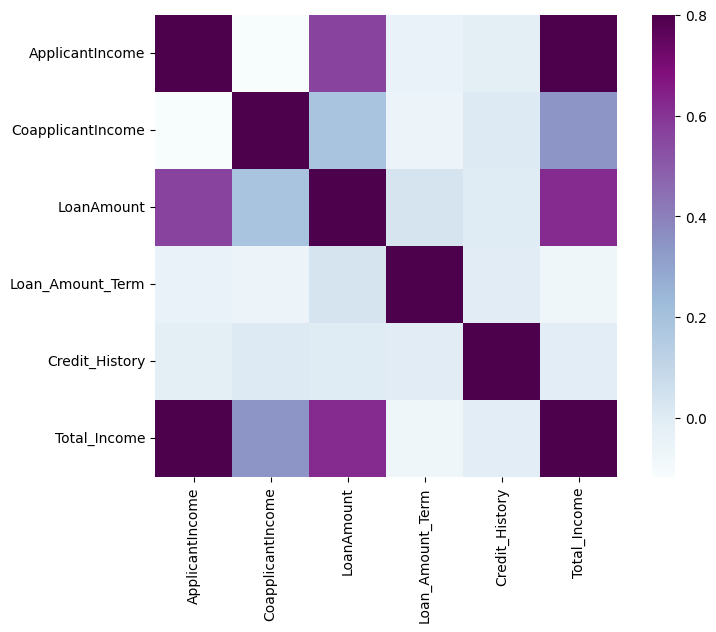

In [16]:
# Select numerical columns
numerical_columns = data1.select_dtypes(include=['number'])

# Calculate the correlation matrix
matrix = numerical_columns.corr()

# Create a heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Boxplot for ApplicantIncome')

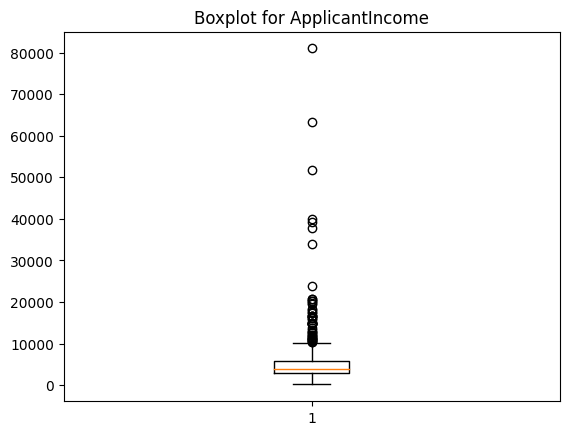

In [17]:
plt.boxplot(data1['ApplicantIncome'])
plt.title('Boxplot for ApplicantIncome')

In [18]:
Q1=np.percentile(data1['ApplicantIncome'],25)
Q1

2877.5

In [19]:
Q3=np.percentile(data1['ApplicantIncome'],75)
Q3

5795.0

In [20]:
IQR=Q3-Q1
IQR

2917.5

In [21]:
low_limit=Q1-1.5*IQR
upr_lim=Q3+1.5*IQR

In [22]:
outlier=[]
for x in data1['ApplicantIncome']:
    if ((x>upr_lim)or(x<low_limit)):
        outlier.append(x)

In [23]:
outlier

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [24]:
ind=data1['ApplicantIncome']>upr_lim
data1.loc[ind].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [25]:
data1=data1[data1.ApplicantIncome.isin(outlier) == False]

Text(0.5, 1.0, 'Boxplot for ApplicantIncome')

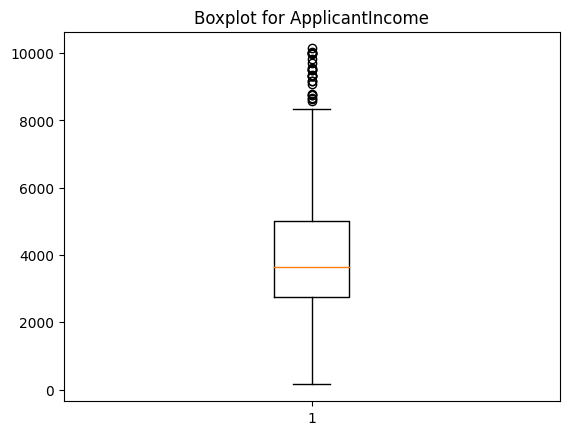

In [26]:
plt.boxplot(data1['ApplicantIncome'])
plt.title('Boxplot for ApplicantIncome')

<AxesSubplot: xlabel='Education', ylabel='ApplicantIncome'>

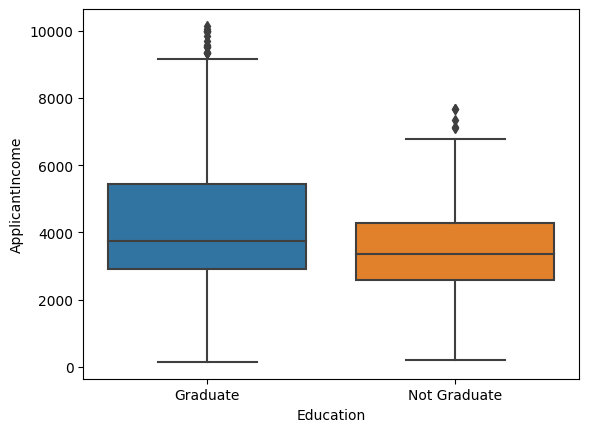

In [27]:
sns.boxplot(x='Education',y='ApplicantIncome',data=data1)

In [28]:
data1['Dependents'].replace('3+', 3,inplace=True) 
data1['Dependents'].replace('3+', 3,inplace=True) 
data1['Loan_Status'].replace('N', 0,inplace=True) 
data1['Loan_Status'].replace('Y', 1,inplace=True)

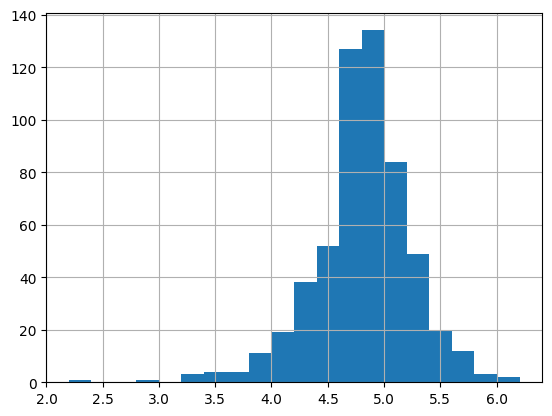

In [29]:
data1['LoanAmount_log'] = np.log(data1['LoanAmount']) 
data1['LoanAmount_log'].hist(bins=20) 
data1['LoanAmount_log'] = np.log(data1['LoanAmount'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

In [30]:
from sklearn.preprocessing import LabelEncoder
category= ['Married','Gender','Self_Employed','Education','Self_Employed',"Property_Area",'Total_Income_bin'] 
encoder= LabelEncoder()
for i in category:   
 data1[i] = encoder.fit_transform(data1[i]) 

In [31]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,1,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,3,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,0,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,1,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,1,4.948760


In [32]:
data1.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
Total_Income         float64
Total_Income_bin       int32
LoanAmount_log       float64
dtype: object

In [33]:
data1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
Total_Income_bin     0
LoanAmount_log       0
dtype: int64

In [34]:
data1['Loan_ID'] = pd.to_numeric(data1['Loan_ID'], errors='coerce')

In [35]:
data1=data1.drop(["Loan_ID"],axis=1)
data1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,1,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,3,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,0,4.189655
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,1,4.787492
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,1,4.948760


In [36]:
x = data1.drop('Loan_Status', axis = 1)
y = data1['Loan_Status']
x_test = data1

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf= DecisionTreeClassifier(criterion='gini')

clf= DecisionTreeClassifier(criterion='entropy')

In [40]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=clf.predict(x_test)

In [42]:
from sklearn import metrics

In [43]:
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7876106194690266


In [44]:
from sklearn import tree

In [45]:
plt.figure(figsize =(100,150))
tree.plot_tree(clf)
plt.show()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf= RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = clf.predict(x_test)

In [49]:
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.8141592920353983


# boosting Method

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
ad_clf= AdaBoostClassifier(n_estimators=10)
ad_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [52]:
y_pred=ad_clf.predict(x_test)

In [53]:
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.8230088495575221


# bagging classifiers  
### base model is decision tree

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
tree = DecisionTreeClassifier()

In [56]:
bg_clf = BaggingClassifier(estimator = tree, n_estimators = 100, random_state = 42)

In [57]:
bg_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [58]:
y_pred_bg = bg_clf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test, y_pred_bg)

0.8053097345132744

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [62]:
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred_rf)

0.8141592920353983

## ADABOOST

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(x_train,y_train)
y_pred_ada = ada_clf.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred_ada)

0.7522123893805309

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 42)
gb_clf.fit(x_train,y_train)
y_pred_gb = gb_clf.predict(x_test)

In [67]:
accuracy_score(y_test, y_pred_gb)

0.8053097345132744